# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import datetime as dt
sns.set_style('whitegrid')
%matplotlib inline
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_rows',50)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('D:\\zerotopandas\\customer_shopping_data.csv')

In [3]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [4]:
# Drop unnecssary columns
df.drop(columns = 'invoice_no', inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99457 non-null  object 
 1   gender          99457 non-null  object 
 2   age             99457 non-null  int64  
 3   category        99457 non-null  object 
 4   quantity        99457 non-null  int64  
 5   price           99457 non-null  float64
 6   payment_method  99457 non-null  object 
 7   invoice_date    99457 non-null  object 
 8   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 6.8+ MB


In [6]:
# Change column type
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

In [7]:
# Check duplicated values
df.duplicated().sum()

0

- No duplicated values

In [8]:
# Check for null values
d1 = pd.Series(df.isnull().sum() , name = 'Null Values')
d2 = pd.Series(df.isnull().mean()*100, name = 'Percentage')
pd.concat([d1,d2],axis = 1)

,Null Values,Percentage
customer_id,0,0.0
gender,0,0.0
age,0,0.0
category,0,0.0
quantity,0,0.0
price,0,0.0
payment_method,0,0.0
invoice_date,0,0.0
shopping_mall,0,0.0


- There is no missing values in this dataset

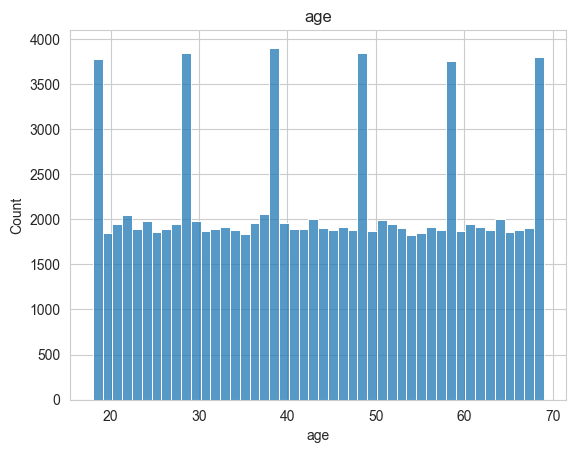

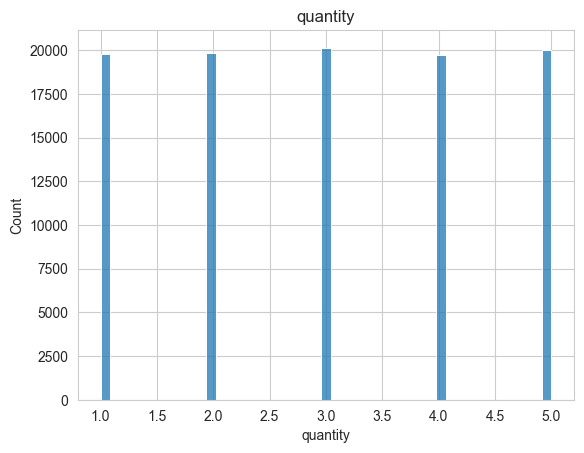

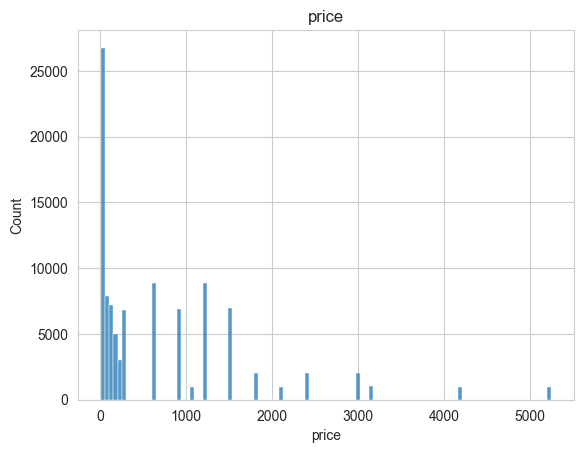

In [9]:
# Check data integrity
col_numerical = df.select_dtypes(['int64','float64'])
for i in col_numerical:
    sns.histplot(df, x = df[i])
    plt.title(i)
    plt.show()

- There is no anomalies in numerical data

In [10]:
# Check data integrity in categorical columns
col_categorical = df.select_dtypes('object')
col_categorical = col_categorical[['customer_id', 'gender', 'category', 'payment_method','shopping_mall']]
for i in col_categorical:
    print(i)
    print('**************')
    print(df[i].unique())
    print('There are {} unique values in {}'.format(df[i].nunique(),i))
    print('**************')

customer_id
**************
['C241288' 'C111565' 'C266599' ... 'C103292' 'C800631' 'C273973']
There are 99457 unique values in customer_id
**************
gender
**************
['Female' 'Male']
There are 2 unique values in gender
**************
category
**************
['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
There are 8 unique values in category
**************
payment_method
**************
['Credit Card' 'Debit Card' 'Cash']
There are 3 unique values in payment_method
**************
shopping_mall
**************
['Kanyon' 'Forum Istanbul' 'Metrocity' 'Metropol AVM' 'Istinye Park'
 'Mall of Istanbul' 'Emaar Square Mall' 'Cevahir AVM' 'Viaport Outlet'
 'Zorlu Center']
There are 10 unique values in shopping_mall
**************


- No anomalies in categorical columns

In [11]:
# Relocate columns
new_col = [ 'invoice_date','customer_id', 'gender', 'category',
       'payment_method', 'shopping_mall', 'age', 'quantity', 'price']
df = df[new_col]

In [12]:
df = df.sort_values('invoice_date')
df

,invoice_date,customer_id,gender,category,payment_method,shopping_mall,age,quantity,price
38995,2021-01-01,C238585,Male,Clothing,Credit Card,Kanyon,24,5,1500.40
70063,2021-01-01,C913265,Male,Souvenir,Cash,Metropol AVM,30,1,11.73
36955,2021-01-01,C169558,Female,Clothing,Credit Card,Mall of Istanbul,59,3,900.24
29200,2021-01-01,C210302,Female,Food & Beverage,Credit Card,Kanyon,24,2,10.46
29201,2021-01-01,C329731,Male,Cosmetics,Debit Card,Kanyon,43,3,121.98
...,...,...,...,...,...,...,...,...,...
15127,2023-12-02,C166014,Male,Toys,Credit Card,Metrocity,22,1,35.84
32544,2023-12-02,C566943,Female,Clothing,Credit Card,Mall of Istanbul,22,5,1500.40
61735,2023-12-02,C270673,Female,Clothing,Cash,Kanyon,49,3,900.24
39915,2023-12-02,C435947,Male,Toys,Cash,Metropol AVM,66,4,143.36


In [13]:
# Create new calculated field
df['revenue_generated'] = df['quantity'] * df['price']

In [14]:
df

,invoice_date,customer_id,gender,category,payment_method,shopping_mall,age,quantity,price,revenue_generated
38995,2021-01-01,C238585,Male,Clothing,Credit Card,Kanyon,24,5,1500.40,7502.00
70063,2021-01-01,C913265,Male,Souvenir,Cash,Metropol AVM,30,1,11.73,11.73
36955,2021-01-01,C169558,Female,Clothing,Credit Card,Mall of Istanbul,59,3,900.24,2700.72
29200,2021-01-01,C210302,Female,Food & Beverage,Credit Card,Kanyon,24,2,10.46,20.92
29201,2021-01-01,C329731,Male,Cosmetics,Debit Card,Kanyon,43,3,121.98,365.94
...,...,...,...,...,...,...,...,...,...,...
15127,2023-12-02,C166014,Male,Toys,Credit Card,Metrocity,22,1,35.84,35.84
32544,2023-12-02,C566943,Female,Clothing,Credit Card,Mall of Istanbul,22,5,1500.40,7502.00
61735,2023-12-02,C270673,Female,Clothing,Cash,Kanyon,49,3,900.24,2700.72
39915,2023-12-02,C435947,Male,Toys,Cash,Metropol AVM,66,4,143.36,573.44


In [15]:
df.to_excel('shopping_data.xlsx')